# TME 1 : Données blablacar

**Ce fichier est le fichier de travail**, l'autre fichier blablacar est donné pour information et pour montrer comment les données ont été collectées.

_Note personnelle, ce TME constitue une toute première découverte de numpy et matplotlib._  
_Sujet et liens utiles sur_ 
http://mapsi.lip6.fr/pmwiki.php?n=Main.TutoPythonJN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pickle as pkl
import math

## Chargement des données

Les données sont stockées au format pickle (code fourni ci-dessous):

1. Importer le module : import `pickle as pkl`
1. Charger les données avec `load`
1. La structure est un dictionnaire, les données sont dans le champ `data`
1. La description des colonnes est dans `indexcol`

In [2]:
# chargement des données
fich = pkl.load( open('donnees_blablacar.pkl', 'rb'))

# {'indexcol': cols , 'data':pp2db, 'villes': villes, 'marques':marques }
titles_col = fich['indexcol']
print(len(titles_col), titles_col) 
data = fich['data']
print(data.shape)
dico_villes = fich['villes']
dico_marques = fich['marques']
print(dico_marques)

14 ['annee', 'mois', 'jour', 'heure', 'dep_ville', 'arr_ville', 'dep_coord_x', 'dep_coord_y', 'arr_coord_x', 'arr_coord_y', 'prix', 'marque', 'stars_confort', 'distance']
(6428, 14)
{'FORD': 6, 'BMW': 12, 'ISUZU': 32, 'OPEL': 1, 'LAND ROVER': 28, 'LIDER': 33, 'DS': 2, 'AUDI': 49, 'DACIA': 45, 'JAGUAR': 39, 'TOYOTA': 13, 'SUZUKI': 20, 'HUNDAI': 42, 'CITROEN': 17, 'IVECO': 8, 'RENAULT': 15, 'SKODA': 27, 'ROVER': 19, 'MITSUBISHI': 5, 'MERCEDES-BENZ': 35, 'DODGE': 29, 'ALFA ROMEO': 37, 'CHEVROLET': 26, 'LANCIA': 10, 'INFINITI': 36, 'DAEWOO': 30, 'MIETWAGEN': 38, 'VOLKSWAGEN': 3, 'LADA': 0, 'GOLF': 4, 'PORSCHE': 23, 'NISSAN': 40, 'unknown': 43, 'SSANGYONG': 34, 'FIAT': 50, 'SAAB': 14, 'CHRYSLER': 51, 'JEEP': 9, 'TESLA': 47, 'PEUGEOT': 25, 'MERCEDES BENZ': 48, 'MAZDA': 31, 'HONDA': 53, 'RANGE ROVER': 11, 'SMART': 24, 'KIA': 52, 'VOLVO': 46, 'LEXUS': 44, 'SUBARU': 18, 'SEAT': 16, 'MINI': 7, 'SUV LEXUS': 21, 'MERCEDES': 41, 'HYUNDAI': 22}


## Discrétisation et histogramme

Nous nous intéressons à la variable `distance` (dernière colonne). Nous allons procéder de la manière suivante:
1. Analyse rapide de la variable aléatoire: calcul de la moyenne et de l'écart-type
1. Analyse plus fine (1): affichage des 10 quantiles
1. Analyse plus fine (2): discrétisation de la variable en 10 intervalles de largeur constante & comptage des effectifs dans chaque catégorie (= construction d'un histogramme)
 - Construire l'histogramme à la main. (1) calculer les bornes des intervalles puis (2) utiliser `np.where` pour déterminer les effectifs dans chaque classe. Utiliser `plt.bar` pour l'affichage.
 - Vérifier vos résultats avec `np.histogram` et `plt.hist` pour l'affichage
 - Comparer les quantiles et les bornes des intervalles discrets
1. Discuter le nombre d'intervalles pour l'histogramme et trouver une valeur satisfaisante

**Notes** : 
- dans `np.where`, il faut mettre des parenthèses s'il y a plusieurs clause

> `np.where((x>a) & (x<b))` : tous les indices de x qui satisfont la clause
>
> `np.where((x>a) & (x<b), 1, 0).sum()` : le comptage associé

- Dans `plt.bar`, il faut donner une largeur importante aux bar, sinon on ne voit rien

In [3]:
# Analyse rapide : moyenne, écart-type, calcul des quantiles pour faire la synthèse de cette variable aléatoire

d = data[:,-1] # extraction de la variable distance

n = np.mean(d) # moyenne
sig = np.std(d) # écart-type
print("Mean ", n)
print("Standard deviation ", sig)

quant = np.zeros((10)) # définition des quantiles
for i in range(10):
    quant[i] = np.percentile(d, 10*(i+1))
print("List of significant quantiles\n", quant)

Mean  254.74066583696327
Standard deviation  210.07021031617558
List of significant quantiles
 [  64.    88.   111.   142.   182.   230.   316.   408.6  552.  2254. ]


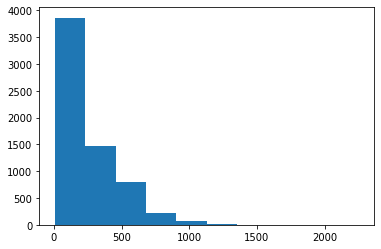

In [4]:
# Discrétisation des distances & histogramme avec np.histogram
arr1, arr2 = np.histogram(d)
plt.figure()
plt.hist(arr2[:-1],arr2,weights=arr1) # retirer la dernière valeur de la série de bornes pour égaliser les formats
plt.show()

Bornes
 [ 225.4  450.8  676.2  901.6 1127.  1352.4 1577.8 1803.2 2028.6 2254. ] Effectifs
 [3.814e+03 1.489e+03 8.240e+02 2.130e+02 6.800e+01 1.400e+01 2.000e+00
 3.000e+00 0.000e+00 1.000e+00]


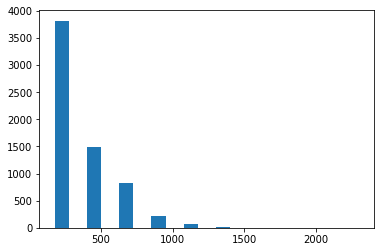

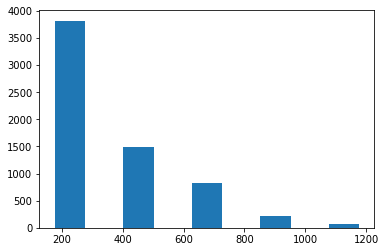

In [5]:
# Discrétisation des distances & histogramme a la main
n = 10 
inter = np.amax(d)/n

#bornes = np.zeros((11))
#bornes[0] = 0
#for i in range (1,11):
#    bornes[i] = bornes[i-1]+inter
# ne fonctionne pas puisque : onze valeurs, c'est trop

# alors que...
bornes = np.zeros((n))
prec = 0
for i in range (n):
    bornes[i] = prec+inter
    prec = bornes[i]

# encore mieux
bornes=np.arange(inter,inter*(n+1),inter) 
# multiplier par 11 et non par 10 sans quoi la valeur np.amax() n'est pas incluse dans l'intervalle

# Calcul des effectifs avec np.where
effectifs = np.zeros((n))
effectifs[0] = np.where((d <= bornes[0]), 1, 0).sum()
for i in range(1,n):
    effectifs[i] = np.where((d > bornes[i-1]) & (d <= bornes[i]), 1, 0).sum()

print("Bornes\n", bornes,"Effectifs\n",effectifs)

# Affichage de l'histogramme
plt.figure()
plt.bar(bornes, effectifs, width=100)
plt.show()

# Les valeurs supérieures à 1355 représentent un effectif négligeable (6/6254).
# Les ignorer peut permettre d'y voir plus clair sur l'histogramme, puisque cette
# décision divise son étendue par plus de deux:
plt.figure()
plt.bar(bornes[:5], effectifs[:5], width=100)
plt.show()
# Ce genre de pratique ne s'explique que par la lisibilité réduite de l'affichage,
# et serait critiquable dans un contexte de présentation officielle des données.
# Nous nous concentrons ici sur la partie "informative" du domaine des mesures.

## Histogramme (bis)
Tracer l'histogramme des prix au km

Prix de revient au kilomètre
 [[0.06617647 0.04807692 0.04918033 ... 0.05263158 0.04390244 0.06217617]]
Bornes
 [0.0062 0.0124 0.0186 0.0248 0.031  0.0372 0.0434 0.0496 0.0558 0.062
 0.0682 0.0744 0.0806 0.0868 0.093  0.0992 0.1054 0.1116 0.1178 0.124
 0.1302 0.1364 0.1426 0.1488 0.155  0.1612 0.1674 0.1736 0.1798 0.186
 0.1922 0.1984 0.2046 0.2108 0.217  0.2232 0.2294 0.2356 0.2418 0.248
 0.2542 0.2604 0.2666 0.2728 0.279  0.2852 0.2914 0.2976 0.3038 0.31
 0.3162 0.3224 0.3286 0.3348 0.341  0.3472 0.3534 0.3596 0.3658 0.372
 0.3782 0.3844 0.3906 0.3968 0.403  0.4092 0.4154 0.4216 0.4278 0.434
 0.4402 0.4464 0.4526 0.4588 0.465  0.4712 0.4774 0.4836 0.4898 0.496
 0.5022 0.5084 0.5146 0.5208 0.527  0.5332 0.5394 0.5456 0.5518 0.558
 0.5642 0.5704 0.5766 0.5828 0.589  0.5952 0.6014 0.6076 0.6138 0.62  ] 
Effectifs
 [3.500e+01 1.000e+00 5.000e+00 2.000e+01 7.800e+01 1.630e+02 5.090e+02
 1.497e+03 1.662e+03 1.421e+03 6.840e+02 2.500e+02 5.300e+01 1.700e+01
 1.400e+01 7.000e+00 2.000e+00 2.

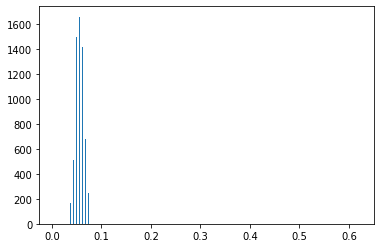

Percentile 99.9  0.15168421052632702


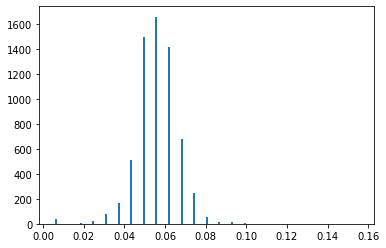

In [6]:
# Histogramme des prix au km : construction de la variable puis utilisation de np.histogram

# d existe déjà
p = data[:,-4]
# pkm = np.array([np.around((p/d),2)])
# on peut arrondir au centime, ou considérer que cela manque de précision
pkm = np.array([(p/d)])
print("Prix de revient au kilomètre\n",pkm)

# Discrétisation des distances & histogramme a la main
n = 100
inter = round((np.amax(pkm)/n),4)
bornes=np.arange(inter,inter*(n+1),inter) 
# multiplier par n+1 et non par n sans quoi la valeur np.amax() n'est pas incluse dans l'intervalle

# Calcul des effectifs avec np.where
effectifs = np.zeros((n))
effectifs[0] = np.where((pkm <= bornes[0]), 1, 0).sum()
for i in range(1,n):
    effectifs[i] = np.where((pkm > bornes[i-1]) & (pkm <= bornes[i]), 1, 0).sum()

print("Bornes\n",bornes,"\nEffectifs\n",effectifs)

# Affichage de l'histogramme
plt.figure()
plt.bar(bornes, effectifs, width=0.001)
plt.show()

# On peut ici aussi ignorer certaines valeurs pour y voir plus clair : la dispersion trop étendue 
# des mesures est bien signifiée par les quantiles, qui montrent que 0.01% d'entre elles seulement 
# dépassent 0.15. On éjecte donc facilement plus de 75% de l'étendue du graphique.

quantile99 = np.percentile(pkm, 99.9)
print("Percentile 99.9 ",quantile99)
plt.figure()
plt.bar(bornes[:25], effectifs[:25], width=0.001)
plt.show()

# Distributions jointes, distributions conditionnelles

Nous voulons maintenant étudier la distribution jointe entre la distance et la marque de la voiture. Partir des distributions discrètes ou discétisées et construire le tableau d'effectif puis normaliser par les effectifs de l'échantillon pour estimer la loi jointe.

Il est diffile d'analyser cette probabilité jointe (cf ci-dessous pour l'affichage)... Nous allons donc passer à la loi conditionnelle: nous voulons donc calculer la probabilité de la distance conditionnellement à la marque de la voiture.

1. Proposer un critère rapide pour vérifier que votre distribution conditionnelle respecte bien les propriétés de base
1. Cette distribution conditionnelle fait apparaitre des pics très marqués: pouvons-nous tirer parti de ces informations?

**Note:** 
- pour afficher une matrice `p_dm`, la meilleure solution est la suivante:
> `plt.imshow(p_dm, interpolation='nearest')`
>
> `plt.show()`
- la variable `marque` est bruitée. Vous pourrez vous amuser à éliminer ou fusionner certaines catégories
- les indices dans une matrice doivent toujours être entiers. `int(...)`
- pour ajouter une description sur l'axe des x:
```python
fig, ax = plt.subplots(1,1)
plt.imshow(p_dsm, interpolation='nearest')
ax.set_xticks(np.arange(len(dico_marques)))
ax.set_xticklabels(dico_marques.keys(),rotation=90,fontsize=8)
plt.show()
```
- Si l'image est trop petite pour voir quelque chose: solution = sauvegarde en pdf (ie vectorielle) + ouverture avec un logiciel de lecture pdf
```python
plt.savefig('mafigure.pdf')
```



Distances discrétisées
 [1. 2. 0. ... 0. 2. 2.]
Loi jointe
 [[0.         0.00544493 0.00155569 ... 0.         0.00140012 0.00031114]
 [0.         0.00980087 0.00248911 ... 0.         0.00171126 0.00140012]
 [0.         0.00466708 0.00046671 ... 0.         0.00108899 0.00108899]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


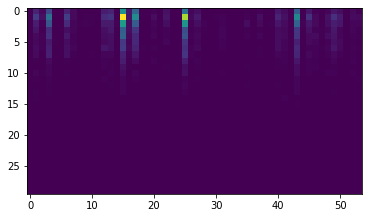

In [7]:
# Loi jointe distance / marque

# Construction de la distance discrétisée 
# Dimensions : = (Nind x 1) = mêmes dimensions que d
# Contenu = catégorie de distance (entre 0 et 29 par exemple si on a discrétisé en 30 catégories)
dd = np.zeros((d.shape))
n = 30
inter = round((np.amax(d)/n),10) # sans round, np.arange calculerait une 32e borne
bornes=np.arange(inter,inter*(n+1),inter) 

# entre 0 et 29, vous êtes dans la catégorie 0
# entre 30 et 59, vous êtes dans la catégorie 1

# Remplissage avec np.where
dd = np.where((d <= bornes[0]), 0, dd)
for i in range(1,n):
    dd = np.where((d > bornes[i-1]) & (d <= bornes[i]), i, dd)
print("Distances discrétisées\n",dd)

p_dm = np.zeros((len(bornes), len(dico_marques)))
# Remplissage de la matrice p_dm = double boucle + comptage
for i in range(p_dm.shape[0]):
    for j in range(p_dm.shape[1]):
        p_dm[i,j]=np.where((dd==i) & (data[:,-3]==j), 1, 0).sum()
p_dm /= p_dm.sum() # normalisation
print("Loi jointe\n",p_dm)

# Affichage du résultat
plt.figure()
plt.imshow(p_dm, interpolation='nearest')
plt.show()

Loi conditionnelle
 [[0.         0.17241379 0.22727273 ... 0.         0.16981132 0.07142857]
 [0.         0.31034483 0.36363636 ... 0.         0.20754717 0.32142857]
 [0.         0.14778325 0.06818182 ... 0.         0.13207547 0.25      ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


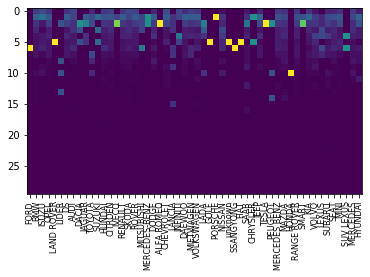

Vérification
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
# Loi conditionnelle distance | marque
# Calcul d'une marginale
p_m = np.zeros((len(dico_marques)))
for i in range(len(dico_marques)):
    p_m[i]=np.sum((p_dm[:,i]))

# Calcul de la conditionnelle
p_dsm = np.array((p_dm.shape))
p_dsm=p_dm/p_m
print("Loi conditionnelle\n", p_dsm)

# Affichage
fig, ax = plt.subplots(1,1)
plt.imshow(p_dsm, interpolation='nearest')
ax.set_xticks(np.arange(len(dico_marques)))
ax.set_xticklabels(dico_marques.keys(),rotation=90,fontsize=8)
plt.show()

# Proposition d'un critère très rapide pour vérifier qu'il s'agit bien d'une distribution conditionnelle
# Chaque ligne somme à 1 ! à voir :
verif = np.zeros((len(bornes)))
for i in range(len(bornes)):
    verif[i]=np.sum(p_dsm[:,i])
print("Vérification\n", verif)
# et voilà

# Il y a apparemment plus de chances de parcourir de grandes distances en Honda.
# Land Rover et Peugeot emnbarquent assez souvent des clients pour de longs voyages.
# D'autres marques, petites citadines ou voitures de luxe, ne sont pas favorisées 
# pour aller très loin : on prendra l'exemple des Jaguar, des Porsche ou des Tesla.

## Tracé de l'ensemble de l'échantillon avec des codes couleurs

Nous proposons ensuite de tracer toutes les trajectoires des voitures blablacar. Pour cela, il faut utiliser la commande `plt.plot`.
Vous devez optenir des étoiles à partir des 7 villes requêtes: `['Paris', 'Marseille', 'Grenoble', 'Lille', 'Strasbourg', 'Nantes', 'Bordeaux']`.
Mais on ne voit pas grand chose... Et ça prend beaucoup de temps à tracer avec une boucle for. On propose donc une série d'exercice pour mieux comprendre ce qui se passe.
1. Attention à l'ordre des arguments dans le plot:
```plt.plot(tous_les_x, tous_les_y)```
Afin de tracer des trajectoires, il faut envoyer les x et les y 2 par 2 dans une boucle `for`
1. Pour éviter les boucles, il existe une méthode `quiver` dédiée au tracé de champs de vecteurs: ça ira beaucoup plus vite qu'avec plot. Il faut juste bien comprendre les mécanismes d'échelles. Pour utiliser l'échelle 1, la commande est la suivante:
```python
plt.quiver(x_dep, y_dep, delta_x, delta_y,\
            angles='xy', scale_units='xy', scale=1)
```
1. Isoler les trajets proposés à partir de chacune des villes sachant les coordonnées sont:
```python
coord = np.array([[45.18721767,  5.72345183],
 [47.22572172, -1.56558993],
 [50.63010695,  3.07071992],
 [48.5782548,   7.74078742],
 [44.83848889, -0.58156509],
 [43.2991509,   5.38925024],
 [48.8477201,   2.34607889]])
```
Chaque trajectoire (point de départ) sera rattachée à la ville la plus proche.
Une fois la distance calculée pour chaque origine de trajectoire, vous pourrez avoir besoin de `argmin`
1. Tracer les trajets d'une couleur spéciale en fonction des origines. 

Les commandes matplotlib attendent des instructions de couleur au format RGB ou avec des lettres. Je vous propose une solution élégante pour distinguer les villes.
 - soit l'index de la ville la plus proche sotcké dans `ville_or` (0,...,7)
 - construire le dictionnaire: `dict({0:'b', 1:'r', 2:'k', 3:'y', 4:'c', 5:'m', 6:'g'})`
 - transformer `ville_or` en `ville_c` en vectorisant l'appel à la table de hash:
```python
ville_c = np.vectorize(dico.get)(ville_or)
```

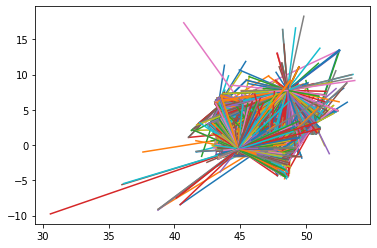

In [9]:
# Tracé de l'ensemble des trajectoires avec un code couleur en fonction de la ville de départ

for i in range(data.shape[0]):
    plt.plot((data[i,6],data[i,8]),(data[i,7],data[i,9]))

plt.show()

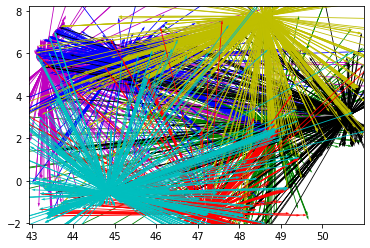

In [10]:
# Trouver l'information sur la ville la plus proche
departs = np.zeros((data.shape[0]))

coord = np.array([[45.18721767,  5.72345183], #Grenoble
 [47.22572172, -1.56558993], #Nantes
 [50.63010695,  3.07071992], #Lille
 [48.5782548,   7.74078742], #Strasbourg
 [44.83848889, -0.58156509], #Bordeaux
 [43.2991509,   5.38925024], #Marseille
 [48.8477201,   2.34607889]]) #Paris

# Calcul de la matrice de distances
dist = np.zeros((data.shape[0],coord.shape[0]))
for i in range(dist.shape[0]):
    for j in range (dist.shape[1]):
        dist[i,j]=math.sqrt(((coord[j][0]-data[i,6])**2)+((coord[j][1]-data[i,7])**2))

# Indice de la ville d'origine du trajet (plus petite distance dans le tableau ci-dessus)
ville_or = np.zeros((dist.shape[0]))
for i in range(dist.shape[0]):
    ville_or[i] = np.argmin(dist[i])

# Coordonnées des villes d'origine correctement associées à leur numéro de ligne
# bien pratique pour l'histogramme
origines=np.zeros((data.shape[0],2))
for i in range(data.shape[0]):
    origines[i,0]=coord[int(ville_or[i]),0]
    origines[i,1]=coord[int(ville_or[i]),1]

# Astuce pour construire une correspondance indice => code couleur
dico = dict({0:'b', 1:'r', 2:'k', 3:'y', 4:'c', 5:'m', 6:'g'})
ville_c = np.vectorize(dico.get)(ville_or)

# Quel est le facteur de déplacement entre ville_or et le point d'arrivée ?
# plt.quiver concerne de fait des vecteurs et non des segments
trajets1=data[:,8]-origines[:,0]
trajets2=data[:,9]-origines[:,1]

plt.figure()
plt.quiver(origines[:,0], origines[:,1], trajets1, trajets2, color= ville_c,  angles='xy', scale_units='xy', scale=1)
plt.savefig('cartedefrance.png', bbox_inches='tight')
plt.show()

On pense à redresser la carte avant de lui appliquer une transformation en miroir.
(le méridien de Greenwich a la mauvaise idée de regarder vers l'Ouest)

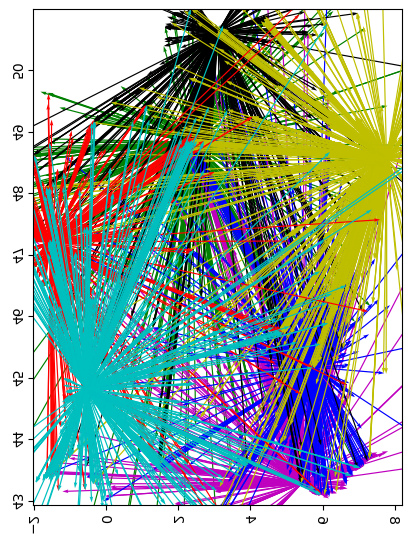

## Etude de la corrélation entre variables

On propose d'étudier la corrélation entre la distance du trajet et le nombre d'étoiles de confort. Attention, les étoiles ne sont pas toujours renseignées (-1 = inconnu). On fera aussi ces opérations entre la distance et le prix.

1. Tracer dans le plan les coordonnées (distance,etoile) pour les points concernés

Vous utiliserez la commande `scatter` pour réaliser l'opération
1. Calculer le coefficient de corrélation entre les deux variables aléatoires


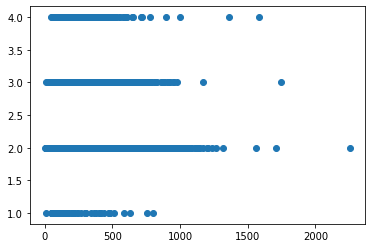

Corrélation entre la notation et la distance  0.04876702920117717


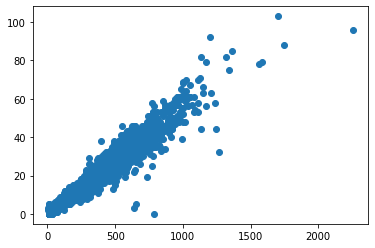

Corrélation entre le prix et la distance  0.9728618796588476


In [11]:
# Test de corrélation entre la distance et le confort de la voiture
correle = np.vstack((data[:,-2],d))
correle = correle[:, ~np.any(correle == -1, axis=0)]
plt.figure()
plt.scatter(correle[1,:],correle[0,:])
# Affichage du nuage de points correspondant au deux variables
plt.show()

# Calcul du coefficient de corrélation pour tous les points admissibles 
# (ceux pour lesquels les étoiles sont renseignées)
coeffe = np.corrcoef(correle[1,:],correle[0,:])
print("Corrélation entre la notation et la distance ", coeffe[0,1])

# La corrélation n'est pas du tout établie.

# Test de corrélation entre la distance et le prix
correlp = np.vstack((data[:,-4],d))
plt.figure()
plt.scatter(correlp[1,:],correlp[0,:])
# Affichage du nuage de points correspondant aux deux variables
plt.show()

# Calcul du coefficient de corrélation pour tous les points admissibles 
coeffp = np.corrcoef(correlp[1,:],correlp[0,:])
print("Corrélation entre le prix et la distance ", coeffp[0,1])

# Ici, par contre, elle l'est.

## Quelques questions supplémentaires

### Prix au kilomètre en fonction de l'origine
On s'interroge sur le prix des courses en fonction des villes de départ. On ne veut pas tomber dans des pièges liés à des résumés simplistes, nous allons donc calculer la distribution jointe (prix_km, ville_origine).
1. Mettre au propre le code de discrétisation en construisant une méthode de signature:
```python
def discretisation(x, nintervalles):
    #[...]
    return bornes, effectifs, xd 
```
1. Mettre au propre le code de calcul de la loi jointe entre deux échantillons de variables aléatoires discrètes
```python
def pjointe(xd, yd):
    #[...]
    return pj
```
1. En l'état, nous avons du mal à analyser les données. Ceci est du aux valeurs extrêmes (notamment hautes). Afin de rendre l'analyse robuste, seuiller le prix au km au 99ème percentile (toutes les valeurs supérieures sont ramenées à cette valeur limite).
1. Proposer quelques analyses.

### Même analyse pour voir dans quelle ville les gens sont plus matinaux, s'ils partent plus vers le sud ou le nord, l'est ou l'ouest...

Si vous étiez un journaliste en manque de sujet de reportage, quel(s) graphique(s) calculeriez-vous à partir de ces données? 


In [13]:
def discretisation(x, nintervalles, eps = 0.0000001) :
    inter = round((np.amax(x)/nintervalles),10)
    bornes = np.arange(inter,inter*(nintervalles+1),inter) 
    effectifs = np.zeros((nintervalles))
    effectifs[0] = np.where((x <= bornes[0]), 1, 0).sum()
    for i in range(1,nintervalles):
        effectifs[i] = np.where((x > bornes[i-1]) & (x <= bornes[i]), 1, 0).sum()
    xd = np.zeros((x.shape))
    xd = np.where((x <= bornes[0]), 0, xd)
    for i in range(1,nintervalles):
        xd = np.where((x > bornes[i-1]) & (x <= bornes[i]), i, xd)
    return bornes, effectifs, xd

def pjointe(xd, yd): # variable codées de 0 à valmax
    pj = np.zeros((int(np.amax(xd)+1),int(np.amax(yd)+1)))
    for i in range(pj.shape[0]):
        for j in range(pj.shape[1]):
            pj[i,j]=np.where((xd==i) & (yd==j), 1, 0).sum()
    pj /= pj.sum() # normalisation
    return pj

# L'intégralité du code de ces fonctions provient des exercices précédents.

Conditionnelle
 [[0.00287 0.00428 0.01304 0.00105 0.00214 0.00673 0.00804]
 [0.00096 0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.00107 0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.00107 0.      0.      0.      0.00112 0.     ]
 [0.00096 0.      0.      0.      0.      0.00112 0.     ]
 [0.      0.00214 0.00326 0.00105 0.      0.      0.     ]
 [0.      0.00107 0.00217 0.00105 0.00214 0.      0.00402]
 [0.00096 0.00535 0.00326 0.      0.00427 0.      0.00402]
 [0.00669 0.00214 0.0163  0.00105 0.00214 0.00449 0.     ]
 [0.00478 0.02034 0.00435 0.0021  0.00321 0.00449 0.     ]
 [0.01337 0.02248 0.00435 0.00105 0.00321 0.0101  0.00536]
 [0.00573 0.0182  0.01196 0.00943 0.00748 0.01347 0.0067 ]
 [0.01242 0.0182  0.04239 0.01048 0.01496 0.01459 0.01743]
 [0.03247 0.0803  0.05435 0.01363 0.02137 0.02245 0.00938]
 [0.04298 0.07602 0.0413  0.03669 0.0544

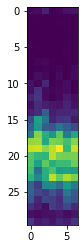

Définition de la catégorie 19 entre  0.049105190300000004 et  0.051689674000000005


In [14]:
# Prix/km, ep. II
pkm = data[:,-4]/data[:,-1]
n = 30 # nb catégories

# Robustesse : calcul du 99è percentile et seuillage des valeurs
percentile99 = np.percentile(pkm, 99)
pkm = np.where(pkm>percentile99, percentile99, pkm)
bornes, effectifs, pkmd = discretisation(pkm, n)

# Probabilité jointe entre le prix au kilomètre et la ville de départ
pj = pjointe(pkmd,ville_or)

# Marginale sur la ville de départ
pv = np.zeros((pj.shape[1])) 
for i in range(pj.shape[1]):
    pv[i]=np.sum((pj[:,i]))
    
# Conditionnelle entre le prix et la ville de départ
p_km_s_v = np.array((pj.shape))
p_km_s_v = pj/pv
print("Conditionnelle\n", np.around(p_km_s_v,5))

fig, ax = plt.subplots(1,1)
plt.imshow(p_km_s_v, interpolation='nearest')
plt.show()

print("Définition de la catégorie 19 entre ", bornes[18], "et ", bornes[19])

# Analyses
# En rappelant le détail des villes présentées en abscisses
# (Grenoble = 0, Nantes = 1, Lille= 2, Strasbourg = 3, Bordeaux = 4, Marseille = 5, Paris = 6),
# les résultats obtenus montrent une corrélation entre la cherté des prix au kilomètre et la ville de 
# départ. Les variables ne sont pas indépendantes.

# Si l'on s'en tient à ce qui a été observé, les prix de catégorie 19 sont les plus populaires en France
# (environ cinq centimes d'euros au kilomètre). A en juger par la position des plus forts contrastes dans 
# le graphique, les Nantais et les Bordelais ont le maximum de chances de négocier ce prix standard. 
# Ils proposent donc de nombreux covoiturages à un prix de revient jugé "raisonnable" par la majorité.

# Deux colonnes se distinguent par la continuité de leur dispersion, celles de Marseille et de Lille.
# Il y a donc une large gamme de prestations possibles pour des prix divers. 

# A en juger par la direction de leur gradient (↑), Nantes et Lille sont les villes les moins chères.
# Les Lillois sont même les seuls à proposer un certain nombre de trajets en-dessous de la catégorie 9.
# Grenoble, Marseille et Strasbourg sont généralement plus chères (gradient ↓).
# On considère alors que Paris et Bordeaux proposent globalement des prix moyens.

# (Est-ce vrai ? N'oublions pas que le seuillage a fait disparaître certaines valeurs.
# On le constate en ignorant cette portion du code : c'est en fait aux Parisiens qu'il arrive le plus 
# souvent de payer le prix fort. Paris est la seule ville pour laquelle il existe, malgré une fréquence
# infime, des valeurs mesurées dans des catégories très élevées. 
# Les données ne disent pas si c'est bien mérité.)

# COMMENTAIRES